In [1]:
%matplotlib inline


# Classifier comparison


A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.



In [118]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

h = .02  # step size in the mesh

names = ["Naive Bayes", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost"]

classifiers = [
    GaussianNB(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier()]

Automatically created module for IPython interactive environment


In [73]:
data = pd.read_csv("sklearn-nobad/75+100_37+.csv")
display(data.iloc[:,2:])

,word1,word2
0,no,respetar
1,no,respetar
2,no,estar
3,no,estar
4,no,caber
5,no,caber
6,no,desear
7,no,desear
8,no,ser
9,no,ser


In [88]:
# encode words features

from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(dtype=np.int32)
features = enc.fit_transform(data.iloc[:,2:])
display(features)

# enc.categories_

# It gives error if unseen word!
# display(enc.transform([['a_ciencia_cierta', 'añadir']]))

array([[170, 558],
       [170, 558],
       [170, 294],
       ...,
       [170, 559],
       [170, 347],
       [170, 347]], dtype=int32)

In [105]:
# target and sample weights
target = data.iloc[:,0]
display(target)

weights = data.values[:,1]
display(weights)

0        0
1        1
2        0
3        1
4        0
5        1
6        0
7        1
8        0
9        1
10       0
11       1
12       0
13       1
14       0
15       1
16       0
17       1
18       0
19       1
20       0
21       1
22       0
23       1
24       0
25       1
26       0
27       1
28       0
29       1
        ..
23218    0
23219    1
23220    0
23221    1
23222    0
23223    1
23224    0
23225    1
23226    0
23227    1
23228    0
23229    1
23230    0
23231    1
23232    0
23233    1
23234    0
23235    1
23236    0
23237    1
23238    0
23239    1
23240    0
23241    1
23242    0
23243    1
23244    0
23245    1
23246    0
23247    1
Name: rule, Length: 23248, dtype: int64

array([0.5158550000000001, 0.484145, 0.50555, ..., 0.49348400000000003,
       0.45832799999999996, 0.541672], dtype=object)

In [106]:
X_train, X_test, y_train, y_test, w_train, w_test = \
        train_test_split(features, target, weights, test_size=.3)

In [119]:
for name, clf in zip(names, classifiers):
    print("model :", name, ",", end = '')
    clf.fit(X=X_train, y=y_train, sample_weight=w_train)
    score = clf.score(X=X_test, y=y_test, sample_weight=w_test)
    print(" score =", score)

model : Naive Bayes , score = 0.49680499419261925
model : Linear SVM , score = 0.5016183944944038
model : RBF SVM , score = 0.3670043827474011
model : Decision Tree , score = 0.4847892356844361
model : Random Forest , score = 0.47018256686956
model : AdaBoost , score = 0.46697713150721004


Automatically created module for IPython interactive environment


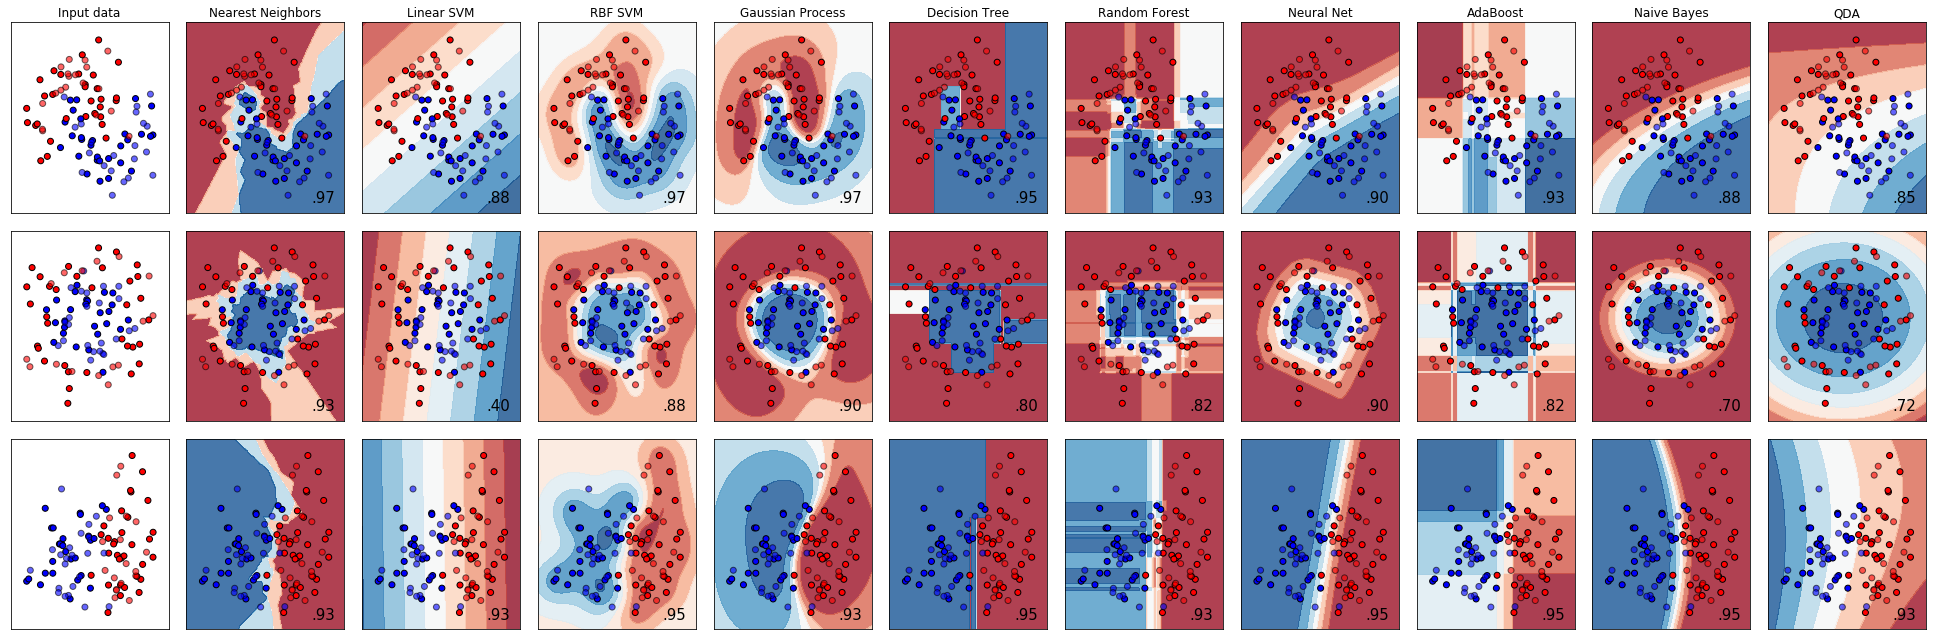

In [2]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()